# Analysis of the results of regression
**Instruction**  
The aim of this notebook is to analyze the results of regression.  
Please execute 'Regression' mode before executing the following code.  
The results by 'Regression' mode are stored in the folder `../Regression_results/`.  

In [228]:
import shap, glob, sys, pickle
import pandas as pd
import numpy as np
sys.path.append('../')
from process import Mol2Vec, Mol2Mordred
shap.initjs()
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14

## SHAP analysis

In [244]:
name = 'Tendo_max'
df = pd.read_csv(f'../datasets/regression/{name}.csv')
df.head(2)

,ID,SMILES,T_endo (K)
0,84,C[Si]1(C)c2ccc(cc2)[Si](C)(C)[Si](C)(C)c2ccc(c...,140.0
1,88,C[NH+](C)CCOC(c1ccccc1)c1ccccc1.O=C(O)CC(O)(CC...,148.0


In [245]:
columns_name = pd.read_csv(f'../Regression_results/{name}/rf/Mordred_fi_all.csv')
columns_name = columns_name.iloc[:,0]

In [246]:
fptype = 'Mordred'
X = Mol2Mordred(df['SMILES'], ignore_3D=True)
X = X.dropna(axis=1)
X = X.select_dtypes("number")

 15%|████▋                           | 13/88 [00:05<00:22,  3.33it/s]

C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 23%|███████▎                        | 20/88 [00:05<00:14,  4.76it/s]

C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|████████████████████████████████| 88/88 [00:07<00:00, 11.18it/s]


C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fro

In [189]:
files = glob.glob(f'../Regression_results/{name}/models/*.pkl')
shap_list = []
for file in files:
    model = pickle.load(open(file, 'rb'))
    explainer = shap.TreeExplainer(model=model, feature_perturbation='tree_path_dependent', model_output='margin')
    shap_values = explainer.shap_values(X=X)
    shap_list.append(shap_values)

model_output = "margin" has been renamed to model_output = "raw"


In [247]:
shap_values = np.array(shap_list)
X = np.array(X)
print(shap_values.shape)
print(X.shape)

(25, 88, 946)
(88, 946)


In [191]:
mean_shap_values = np.average(shap_values, axis = 0)

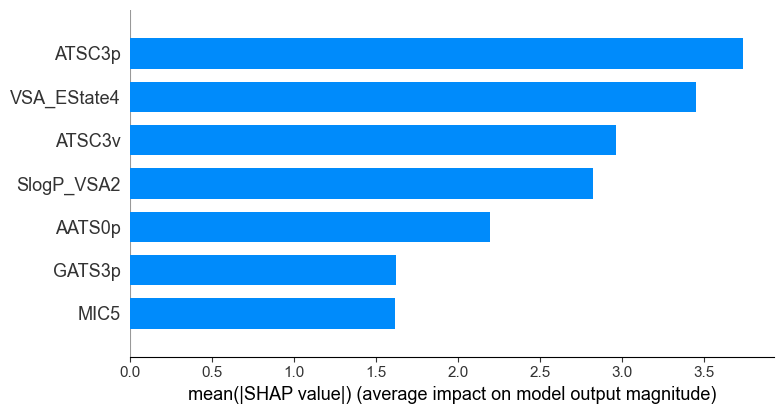

In [192]:
shap.summary_plot(mean_shap_values, X, plot_type="bar", feature_names=columns_name,
                  max_display=7)

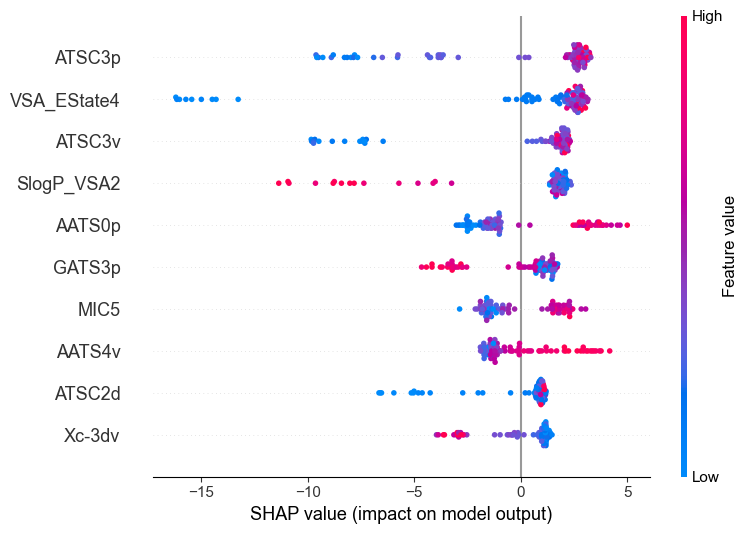

In [193]:
shap.summary_plot(mean_shap_values, X, max_display=10, feature_names=columns_name)

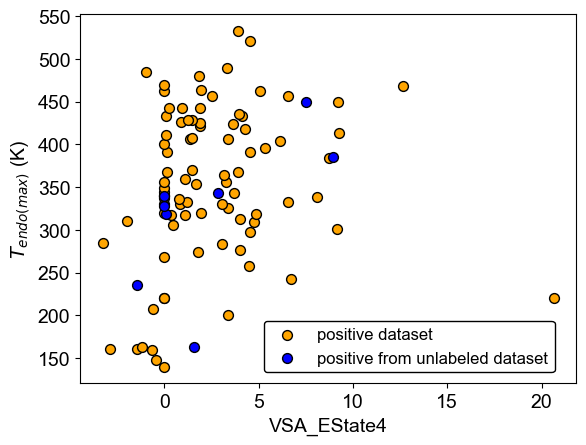

In [230]:
axis = 'VSA_EState4'
plt.scatter(X[:,list(columns_name).index(axis)], df['T_endo (K)'], c='orange', ec='k', s=50, label='positive dataset')
plt.scatter(Xnew[axis], df_max['T_endo (K)'], c='b', ec='k', s=50, label='positive from unlabeled dataset')
plt.xlabel(axis)
plt.ylabel('$T_{endo(max)}$ (K)')
plt.legend(bbox_to_anchor=(0.37, 0.17), loc='upper left', borderaxespad=0, fontsize=12,
           framealpha = 1, facecolor="white" ,edgecolor="black")
# plt.scatter(X[:,list(columns_name).index('ATSC3v')], df['T_endo (K)'])
# plt.scatter(X[:,list(columns_name).index('SlogP_VSA2')], df['T_endo (K)'])
# plt.scatter(X[:,list(columns_name).index('GATS3p')], df['T_endo (K)'])

## y-y plot

In [234]:
df = pd.read_csv('../datasets/ComfirmedPositive.csv')
df = df[['SMILES', 'T_endo (K)']]
df = df.dropna()
df = df.sort_values('T_endo (K)')
df_max = df.drop_duplicates(subset=['SMILES'], keep='last')

In [235]:
fptype = 'Mordred'
Xnew = Mol2Mordred(df_max['SMILES'], ignore_3D=True)
Xnew = Xnew.dropna(axis=1)
Xnew = Xnew.select_dtypes("number")
Xnew = Xnew[columns_name]

100%|██████████████████████████████████| 8/8 [00:02<00:00,  2.95it/s]


C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [236]:
Xnew.shape

(8, 946)

In [248]:
files = glob.glob('../Regression_results/Tendo_max/models/*.pkl')
y_new_preds = []
y_pos_preds = []
for file in files:
    model = pickle.load(open(file, 'rb'))
    y_new_pred = model.predict(Xnew)
    y_pos_pred = model.predict(X)
    y_new_preds.append(y_new_pred)
    y_pos_preds.append(y_pos_pred)

In [249]:
y_new_preds = np.array(y_new_preds)
print(y_new_preds.shape)
y_pos_preds = np.array(y_pos_preds)
print(y_pos_preds.shape)

(25, 8)
(25, 88)


In [250]:
y_new_preds_mean = np.average(y_new_preds, axis = 0)
print(y_new_preds_mean.shape)
y_pos_preds_mean = np.average(y_pos_preds, axis = 0)
print(y_pos_preds_mean.shape)

(8,)
(88,)


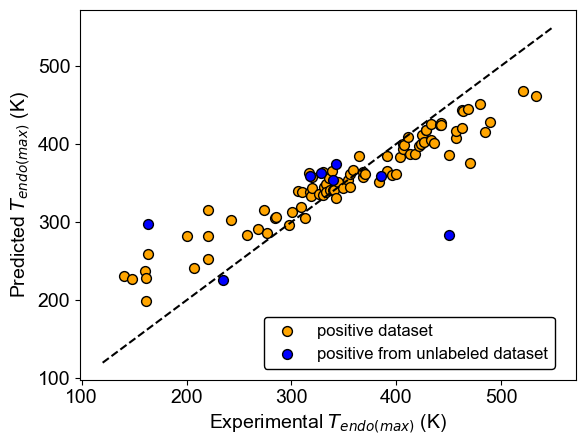

In [255]:
plt.scatter(df['T_endo (K)'], y_pos_preds_mean, c='orange', ec='k', label='positive dataset', s=50)
plt.scatter(df_max['T_endo (K)'], y_new_preds_mean, c='blue', ec='k', label='positive from unlabeled dataset', s=50)
plt.plot([120, 550], [120, 550], linestyle='dashed', c='k')
plt.xlabel('Experimental $T_{endo(max)}$ (K)')
plt.ylabel('Predicted $T_{endo(max)}$ (K)')
plt.legend(bbox_to_anchor=(0.37, 0.17), loc='upper left', borderaxespad=0, fontsize=12,
           framealpha = 1, facecolor="white" ,edgecolor="black")

In [137]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_max['T_endo (K)'], y_preds_mean)

57.07249690079368